# "Stochastic Gradient Descent (SGD)"
> "This post explores SGD, which is an optimization technique (optimizer) that is commonly used in neural networks"

- toc: true
- branch: master
- badges: true
- author: João Marcelo Tozato
- image: images/sgd.png
- categories: [fastai, api]

### Imports

In [ ]:
#hide
#Run once per session
!pip install fastai wwf -q --upgrade

In [1]:
#hide_input
from wwf.utils import state_versions
state_versions(['fastai', 'fastcore', 'wwf'])


---
This article is also a Jupyter Notebook available to be run from the top down. There
will be code snippets that you can then run in any environment.

Below are the versions of `fastai`, `fastcore`, and `wwf` currently running at the time of writing this:
* `fastai` : 2.2.5 
* `fastcore` : 1.3.12 
* `wwf` : 0.0.16 
---

In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [4]:
from fastai.basics import *
import torch
from torch import nn

import numpy as np

import matplotlib.pyplot as plt

from fastai.torch_core import tensor

### Linear Regression 

* Fit a line on 100 points

In [5]:
n = 100

In [6]:
x = torch.ones(n, 2)
len(x), x[:5]

(100,
 tensor([[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]))

randomize in an uniform distribution from -1 to 1

In [7]:
x[:,0].uniform_(-1., 1)
x[:5], x.shape

(tensor([[0.6555, 1.0000],
         [0.0426, 1.0000],
         [0.2065, 1.0000],
         [0.4251, 1.0000],
         [0.9636, 1.0000]]),
 torch.Size([100, 2]))

* Any linear model is `y=mx+b`
* `m`, `x`, and `b` are matrices
* We have `x`

In [8]:
m = tensor(3.,2); m, m.shape

(tensor([3., 2.]), torch.Size([2]))

* `b` is a random bias

In [9]:
b = torch.rand(n); b[:5], b.shape

(tensor([0.4444, 0.2204, 0.3399, 0.5224, 0.1004]), torch.Size([100]))

Now we can make our `y`
* Matrix multiplication is denoted with `@`

In [10]:
y = x@m + b

We'll know if we got a size wrong if:

In [11]:
m@x + b

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2 and 100x2)

Plot our results

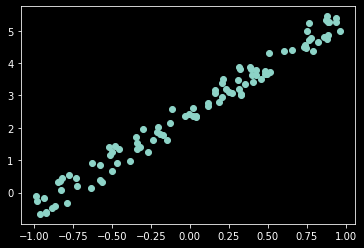

In [12]:
plt.scatter(x[:,0], y)

Our **weights** from last lesson should minimize the distance between points and our line.

* **mean squared error**: Take distance from `pred` and `y`, square, then average

In [13]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

When we run our model, we are trying to predict `m`

For example, say `a = (0.5, 0.75)`.

* Make a prediction
* Calculate the error

In [14]:
a = tensor(.5, .75)

Make prediction

In [15]:
y_pred = x@a

Calculate error

In [16]:
mse(y_pred, y)

tensor(5.2860)

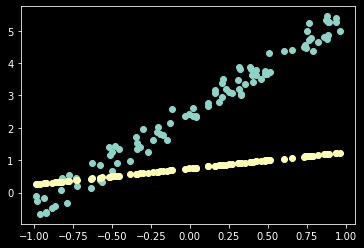

In [17]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_pred)

Model doesn't seen to quite fit. What's next? **Optimization**

### Walking down Gradient Descent

* Goal: Minimize the loss function (`mse`)
* Gradient Descent:
  * Starts with parameters
  * Moves towards new parameters to minimize the function
  * Take steps in the negative direction of gradient function

In [18]:
a = nn.Parameter(a); a

Parameter containing:
tensor([0.5000, 0.7500], requires_grad=True)

Next let's create an `update` function to check if the current `a` improved. If so, move even closer.

We'll print out every 10 iterations to see how we are doing

In [19]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if i % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

* `torch.no_grad`: No back propogation (no updating of our weights)
* `sub_`: Subtracts some value (lr * our gradient)
* `grad.zero_`: Zeros our gradients

In [20]:
lr = 1e-1

In [21]:
for i in range(100): update()

tensor(5.2860, grad_fn=<MeanBackward0>)
tensor(0.5746, grad_fn=<MeanBackward0>)
tensor(0.1852, grad_fn=<MeanBackward0>)
tensor(0.0990, grad_fn=<MeanBackward0>)
tensor(0.0781, grad_fn=<MeanBackward0>)
tensor(0.0730, grad_fn=<MeanBackward0>)
tensor(0.0717, grad_fn=<MeanBackward0>)
tensor(0.0714, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)


Now let's see how this new `a` compares. 

* Detach removes all gradients

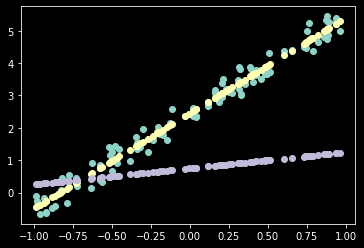

In [22]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], (x@a).detach())
plt.scatter(x[:,0],y_pred)

We fit our line **much** better here

### Animate the process

In [23]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [24]:
a = nn.Parameter(tensor(0.5, 0.75)); a

Parameter containing:
tensor([0.5000, 0.7500], requires_grad=True)

In [25]:
def animate(i):
    update()
    line.set_ydata((x@a).detach())
    return line,

In [26]:
fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], (x@a).detach())
plt.close()

In [27]:
animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)

Ideally we split things up into batches of data to fit, and then work with all those batches (else we'd run out of memory!

If this were a classification problem, we would want to use `Cross Entropy Loss`, where we penalize incorrect confident predictions along with correct unconfident predictions. It's also called `negative loss likelihood`